In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
x = np.array([1,2,3,4,5])
y = np.array([3,4,2,4,5])

df = pd.DataFrame({
    "X" : x,
    "Y" : y
})

In [3]:
df

,X,Y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


In [4]:
xmean = x.mean()
ymean = y.mean()

In [5]:
#m = (x-xmean)*(y-ymean)/(x-xmean)**2

m = sum((x-xmean)*(y-ymean))/sum((x-xmean)**2)
m

0.4

In [6]:
#C = ymean - (m*xmean)

c = ymean - (m*xmean)
print(c)

2.4


In [7]:
def lr(x):
    return (m*x+c)

In [8]:
ypred = np.array(list(map(lr,x)))

In [9]:
ypred

array([2.8, 3.2, 3.6, 4. , 4.4])

Text(0, 0.5, 'Y values')

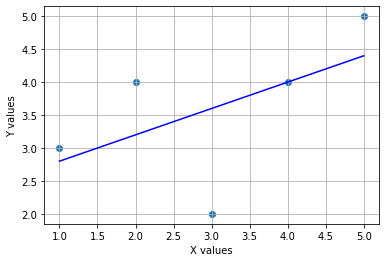

In [10]:
plt.scatter(x,y)
plt.plot(x, ypred, color = 'blue')
plt.grid()
plt.xlabel('X values')
plt.ylabel('Y values')

In [11]:
#MAE
mae = sum(abs((y-ypred)/len(x)))
print(mae)

#MSE
mse = sum((y-ypred)**2)/len(x)
print(mse)

#RMSE
rmse = np.sqrt(sum((y-ypred)**2)/len(x))
rmse

0.6399999999999999
0.72


0.848528137423857

In [12]:
r2 = sum((ypred-ymean)**2)/sum((y-ymean)**2)
r2

0.3076923076923078

In [13]:
df = pd.read_csv('Scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
##Write interpretation




In [16]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
#Write the interpretation of describe method.

In [18]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
def grades(marks):
    if marks > 75:
        return 'A'
    elif (marks < 75 and marks > 60):
        return 'B'
    elif (marks < 60 and marks > 50):
        return 'C'
    elif (marks < 50 and marks  > 40):
        return 'D'
    else:
        return 'F'

In [20]:
df['Scores'].apply(grades)

0     F
1     D
2     F
3     F
4     F
5     F
6     A
7     F
8     A
9     F
10    A
11    B
12    D
13    D
14    F
15    A
16    F
17    F
18    B
19    B
20    F
21    C
22    F
23    A
24    A
Name: Scores, dtype: object

In [21]:
df['Grade'] = df['Scores'].apply(grades)

In [22]:
df.head()

,Hours,Scores,Grade
0,2.5,21,F
1,5.1,47,D
2,3.2,27,F
3,8.5,75,F
4,3.5,30,F


<AxesSubplot:>

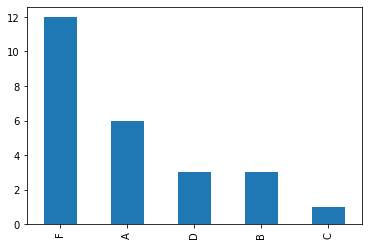

In [23]:
df['Grade'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Grade'>

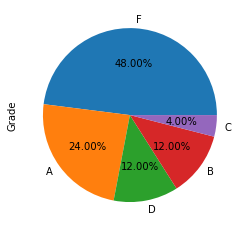

In [24]:
df['Grade'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')

In [25]:
df.head()

,Hours,Scores,Grade
0,2.5,21,F
1,5.1,47,D
2,3.2,27,F
3,8.5,75,F
4,3.5,30,F


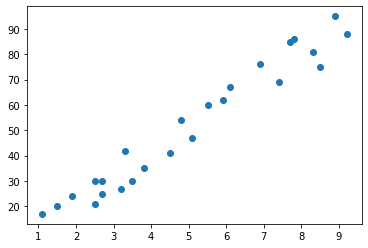

In [26]:
plt.scatter(df['Hours'], df['Scores'])

In [27]:
x = df.iloc[:, :-2]
y = df['Scores']

In [28]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y ,test_size = 0.2)

In [29]:
print(xtrain.shape)

(20, 1)


In [30]:
print(xtest.shape)

(5, 1)


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
#Training the model on train set

model = lr.fit(xtrain,ytrain)  #Calculate values for m and c

In [34]:
model.coef_

array([9.73491981])

In [35]:
model.intercept_

2.7587656645672354

In [36]:
#Prediction

ypred = model.predict(xtest)
ypred

train_pred = model.predict(xtrain)

In [39]:
#plt.scatter(xtrain,ytrain)
#plt.plot(xtrain, train_pred, color = 'r')
#plt.grid()

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
#MAE, MSE, RMSE, R2_score

In [42]:
mae = mean_absolute_error(ytest,ypred)

In [43]:
mae

5.21775209401987

In [44]:
r2_score(ytest,ypred)

0.8786412972579077

- Create a function which will take the user input of number of hours he studies and give prediction of his marks.